### Credit Card Fraud problem and solution
    Detecting fraud transactions is of great importance for any credit card company.
    It is important to  detect potential frauds so that customers are not charged for items that they did not purchase.

### About Dataset
    The Dataset contains two-day transactions made on 09/2013 by European cardholders.
    The dataset contains 492 frauds out of 284,807 transactions.
    Thus, it is highly unbalanced, with the positive (frauds) accounting for only 0.17%.

### Feature Importance
    Features V1, V2, … V28 are the principal components.
    The only features which have not been transformed are ‘Time’ and ‘Amount’.
    ‘Time’ is the seconds elapsed between each transaction and the first. ‘Amount’ is the transaction amount.
    ‘Class’ is the response variable with 1 as fraud and 0 otherwise.
    
### Objective
    The objective is use a Deep Learning (Artificial Neural Network) algorithm to detect whether the transaction is fraud or not.

##### Starting with Importing all the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load dataset
df = pd.read_csv("creditcard.csv")

In [ ]:
# Visualization of data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
# Getting the shape of the data
df.shape

(95162, 31)

In [ ]:
# To get all the details
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,95162.0,41220.807318,16579.974524,0.000000,32919.250000,43264.500000,54272.750000,65191.000000
V1,95162.0,-0.264142,1.867765,-56.407510,-1.028614,-0.260319,1.153098,1.960497
V2,95162.0,-0.037406,1.662025,-72.715728,-0.603497,0.074743,0.732010,18.902453
V3,95162.0,0.676465,1.335794,-33.680984,0.178324,0.756464,1.380144,4.226108
V4,95162.0,0.162307,1.352735,-5.172595,-0.716021,0.188995,1.032434,16.715537
V5,95162.0,-0.279595,1.365154,-42.147898,-0.898671,-0.313955,0.250962,34.801666
V6,95162.0,0.093487,1.302887,-26.160506,-0.647761,-0.157090,0.486449,22.529298
V7,95162.0,-0.107723,1.221749,-31.764946,-0.600284,-0.068859,0.416310,36.677268
V8,95162.0,0.055063,1.208737,-73.216718,-0.138858,0.072532,0.357561,20.007208
V9,95162.0,-0.038993,1.127677,-9.283925,-0.697376,-0.112566,0.570972,10.392889


In [ ]:
# To check if there is any null values present in the dataset
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
#To check the Data types of the features
df.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming 'df' is your DataFrame with missing values
# Replace NaNs in numeric columns with the mean
numeric_columns = df.select_dtypes(include=['number']).columns
if not numeric_columns.empty:
    imputer_numeric = SimpleImputer(strategy='mean')
    df[numeric_columns] = imputer_numeric.fit_transform(df[numeric_columns])

# Replace NaNs in categorical columns with the mode
categorical_columns = df.select_dtypes(include=['object']).columns
if not categorical_columns.empty:
    imputer_categorical = SimpleImputer(strategy='most_frequent')
    df[categorical_columns] = imputer_categorical.fit_transform(df[categorical_columns])

# Now your DataFrame 'df' should not have any missing values


In [ ]:
# to get all the information about all the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95162 entries, 0 to 95161
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    95162 non-null  float64
 1   V1      95162 non-null  float64
 2   V2      95162 non-null  float64
 3   V3      95162 non-null  float64
 4   V4      95162 non-null  float64
 5   V5      95162 non-null  float64
 6   V6      95162 non-null  float64
 7   V7      95162 non-null  float64
 8   V8      95162 non-null  float64
 9   V9      95162 non-null  float64
 10  V10     95162 non-null  float64
 11  V11     95162 non-null  float64
 12  V12     95162 non-null  float64
 13  V13     95162 non-null  float64
 14  V14     95162 non-null  float64
 15  V15     95162 non-null  float64
 16  V16     95162 non-null  float64
 17  V17     95162 non-null  float64
 18  V18     95162 non-null  float64
 19  V19     95162 non-null  float64
 20  V20     95162 non-null  float64
 21  V21     95162 non-null  float64
 22

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
for item in df.columns:
    print(item, ": " )
    print(df[item].unique())
    print(df[item].value_counts())
    print("************************************************")

Time : 
[0.0000e+00 1.0000e+00 2.0000e+00 ... 6.5189e+04 6.5190e+04 6.5191e+04]
64947.0    26
3767.0     21
3770.0     20
19912.0    19
3750.0     19
           ..
26645.0     1
50246.0     1
26647.0     1
26651.0     1
65191.0     1
Name: Time, Length: 43611, dtype: int64
************************************************
V1 : 
[-1.35980713  1.19185711 -1.35835406 ... -3.71571499 -5.16479489
 -1.43096553]
 1.245674    73
-0.302521    36
 0.898614    28
 1.332849    27
 1.335053    26
             ..
-0.556476     1
 1.134109     1
-5.137408     1
-2.130285     1
-1.430966     1
Name: V1, Length: 92837, dtype: int64
************************************************
V2 : 
[-0.07278117  0.26615071 -1.34016307 ...  3.87051102  4.51052641
  1.19266962]
 0.166975    73
 0.447474    36
 0.033896    28
 0.389198    27
 0.331464    26
             ..
 0.763791     1
-0.180436     1
 3.667857     1
-1.338581     1
 1.192670     1
Name: V2, Length: 92837, dtype: int64
******************************

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<Axes: >

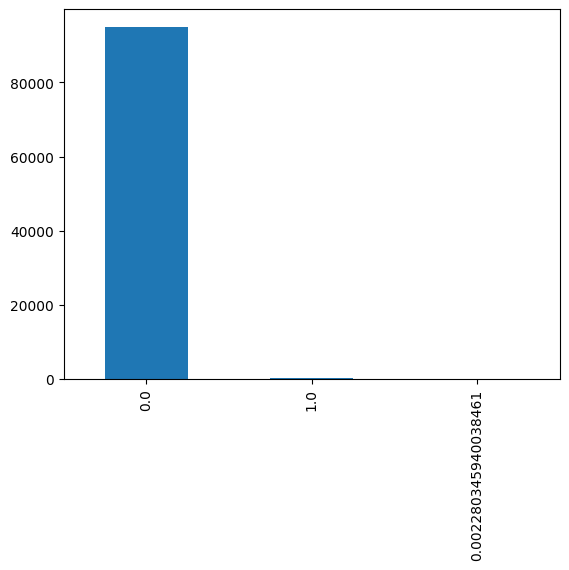

In [ ]:
#Plotting the value counts of the "class" feature
df.Class.value_counts().plot.bar()

In [ ]:
df["Class"].value_counts()

0.00000    94944
1.00000      217
0.00228        1
Name: Class, dtype: int64

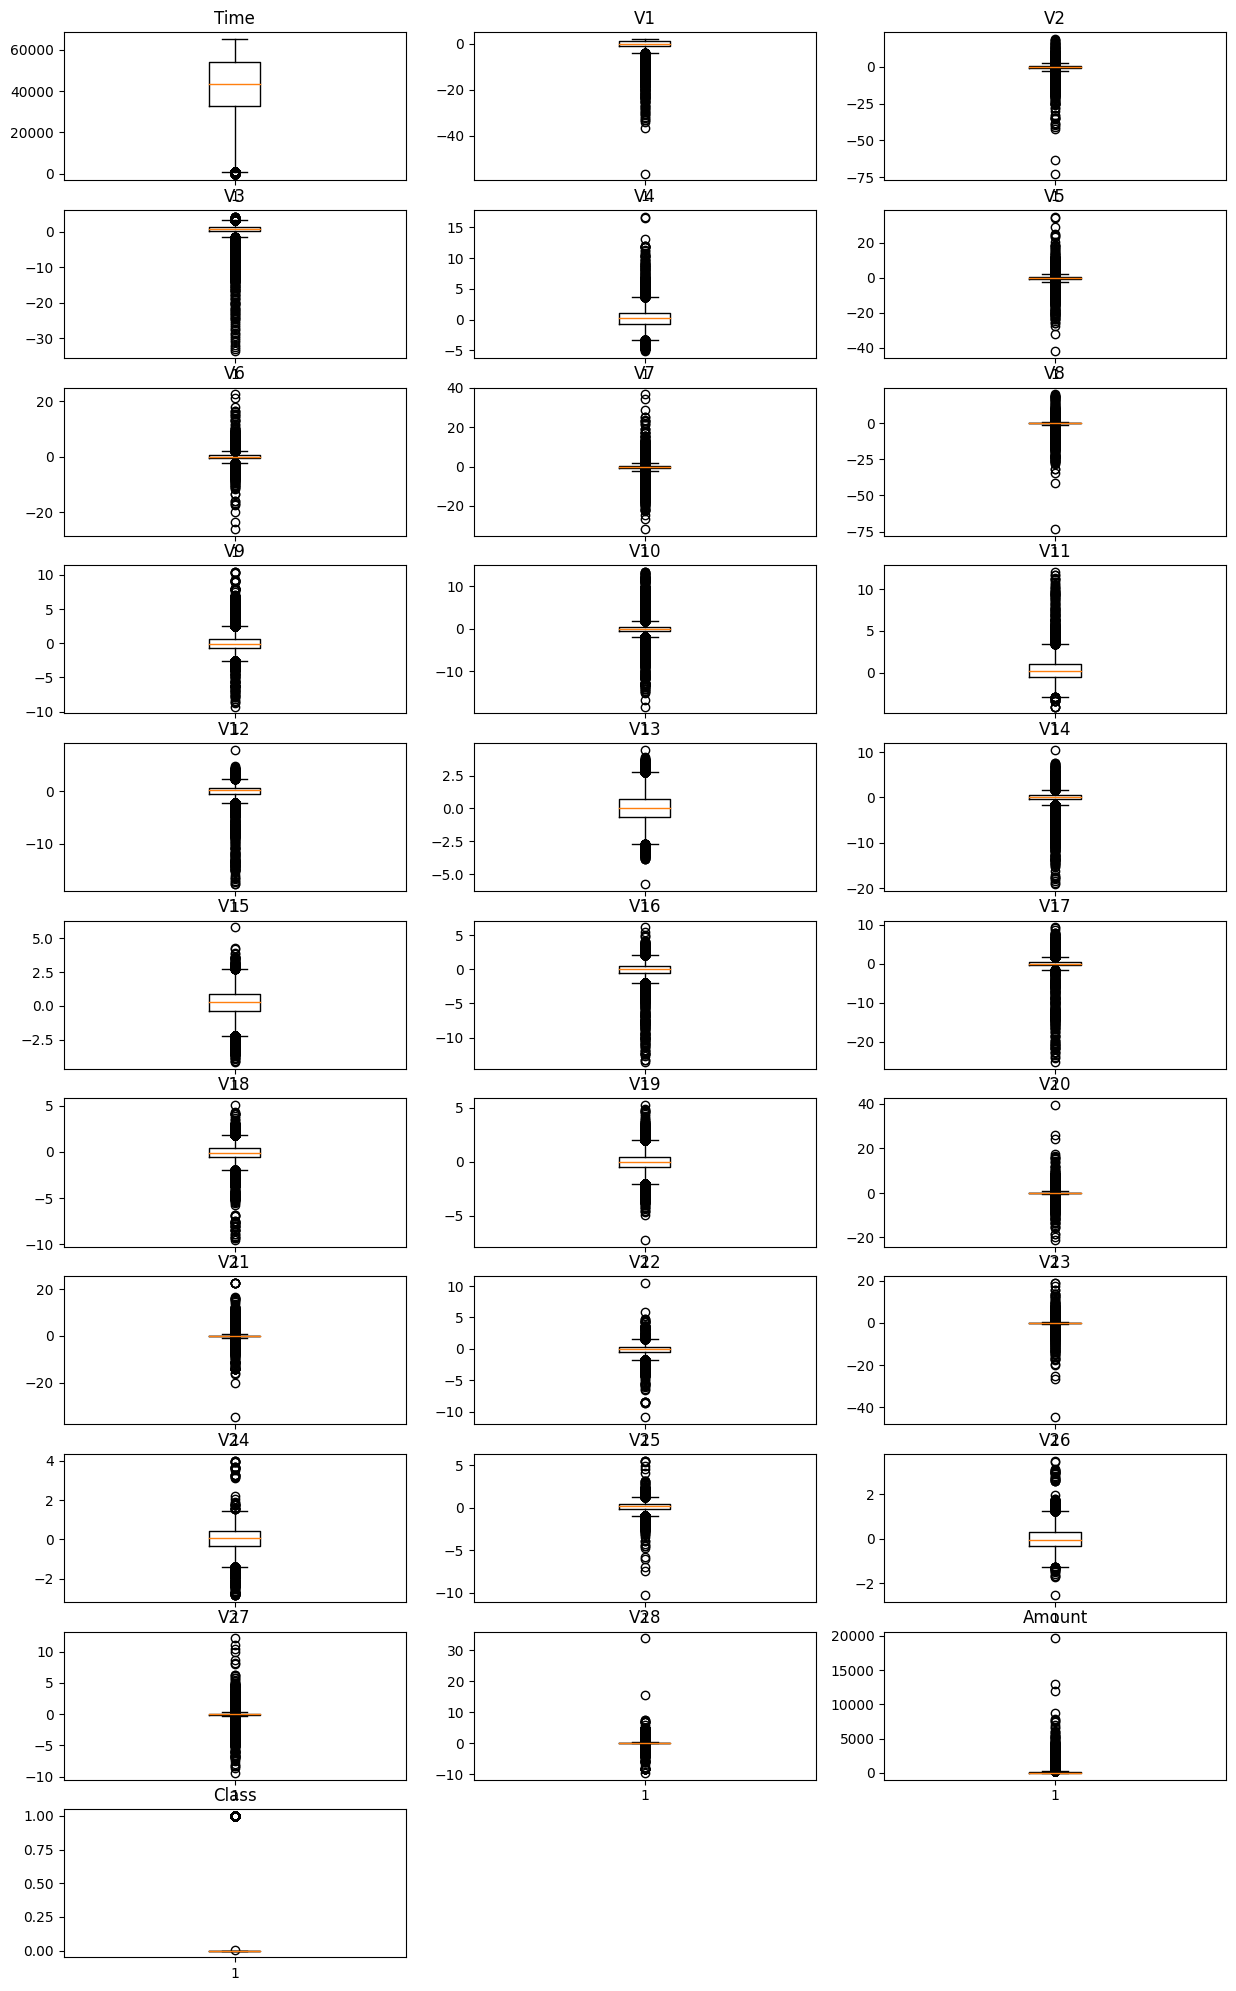

In [ ]:
# Checking for the Outliers in the dataset
plt.figure(figsize = (15,25))
count = 1
for col in df:
    plt.subplot(11,3,count)
    plt.boxplot(df[col])
    plt.title(col)
    count += 1
plt.show()

##### Independent Features and Dependent Features

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Class, dtype: float64

In [ ]:
# Splitting in to Train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(66613, 30) (28549, 30) (66613,) (28549,)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Let's create the ANN model
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Initializing the ANN
model = Sequential()

In [ ]:
# Adding the input layer and first Hidden Layer
model.add(Dense(activation = "relu", input_dim = 30, units = 6, kernel_initializer='uniform' ))

# Adding the Second hidden layer
model.add(Dense(activation = "relu", units =20, kernel_initializer='uniform'))

# Adding the third hidden layer
model.add(Dense(activation = "relu", units = 10, kernel_initializer='uniform'))

# Addinng the output Layer
model.add(Dense(activation = 'sigmoid', units =1, kernel_initializer='uniform',))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 186       
                                                                 
 dense_1 (Dense)             (None, 20)                140       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 547 (2.14 KB)
Trainable params: 547 (2.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# compiling the ANN
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
# Fitting the ANN to the training set
model.fit(X_train, y_train, batch_size = 100, epochs =10)

Epoch 1/10
667/667 [==============================] - 3s 2ms/step - loss: 0.1008 - accuracy: 0.9965
Epoch 2/10
667/667 [==============================] - 1s 2ms/step - loss: 0.0065 - accuracy: 0.9977
Epoch 3/10
667/667 [==============================] - 1s 2ms/step - loss: 0.0053 - accuracy: 0.9977
Epoch 4/10
667/667 [==============================] - 1s 2ms/step - loss: 0.0045 - accuracy: 0.9977
Epoch 5/10
667/667 [==============================] - 1s 2ms/step - loss: 0.0040 - accuracy: 0.9977
Epoch 6/10
667/667 [==============================] - 1s 2ms/step - loss: 0.0037 - accuracy: 0.9977
Epoch 7/10
667/667 [==============================] - 1s 2ms/step - loss: 0.0036 - accuracy: 0.9977
Epoch 8/10
667/667 [==============================] - 1s 2ms/step - loss: 0.0034 - accuracy: 0.9989
Epoch 9/10
667/667 [==============================] - 1s 2ms/step - loss: 0.0033 - accuracy: 0.9992
Epoch 10/10
667/667 [==============================] - 1s 2ms/step - loss: 0.0032 - accuracy: 0.9992

In [ ]:
# Making the Prediction and Evaluating the model
# Predicting the Test set result
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

893/893 [==============================] - 2s 2ms/step


In [ ]:
import pandas as pd

predictions_df = pd.DataFrame({'Predicted': y_pred.flatten()})


predictions_df.to_excel('predicted_values.xlsx', index=False)


##### evaluating the accuracy score and confusion matrix

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Convert y_pred to binary values (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Ensure y_test contains only binary values
y_test_binary = y_test.astype(int)

# Calculate and print the accuracy score
print("Accuracy Score : ", accuracy_score(y_test_binary, y_pred_binary))

# Calculate and print the confusion matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test_binary, y_pred_binary))


Accuracy Score :  0.9991943675785492
Confusion Matrix: 
[[28470    16]
 [    7    56]]


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("creditcard.csv")

# Split features and target variable
X = data.drop(columns=['Class'])  # Features
y = data['Class']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now you can proceed with training your neural network using the scaled features (X_train_scaled, X_test_scaled)
# and target variables (y_train, y_test).


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the ANN architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, batch_size=64, epochs=10, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/10
992/992 [==============================] - 3s 2ms/step - loss: 0.0230 - accuracy: 0.9961 - val_loss: 0.0039 - val_accuracy: 0.9991
Epoch 2/10
992/992 [==============================] - 2s 2ms/step - loss: 0.0053 - accuracy: 0.9990 - val_loss: 0.0026 - val_accuracy: 0.9992
Epoch 3/10
992/992 [==============================] - 3s 3ms/step - loss: 0.0049 - accuracy: 0.9989 - val_loss: 0.0021 - val_accuracy: 0.9991
Epoch 4/10
992/992 [==============================] - 3s 3ms/step - loss: 0.0043 - accuracy: 0.9990 - val_loss: 0.0020 - val_accuracy: 0.9991
Epoch 5/10
992/992 [==============================] - 2s 2ms/step - loss: 0.0040 - accuracy: 0.9992 - val_loss: 0.0021 - val_accuracy: 0.9992
Epoch 6/10
992/992 [==============================] - 2s 2ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.0020 - val_accuracy: 0.9992
Epoch 7/10
992/992 [==============================] - 2s 2ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0021 - val_accuracy: 0.9993
Epoch 

In [ ]:
# Make predictions on the test data
predictions = model.predict(X_test_scaled)

# Convert predictions to binary (0 or 1) based on a threshold
threshold = 0.5  # You can adjust this threshold based on your preference
predicted_labels = (predictions > threshold).astype(int)

# Compare predicted labels with true labels to identify fraud cases
fraud_indices = np.where(predicted_labels == 1)[0]
non_fraud_indices = np.where(predicted_labels == 0)[0]

# Print the indices of fraud transactions
print("Indices of fraud transactions predicted by the model:")
print(fraud_indices)

# Print the corresponding predicted probabilities for fraud transactions
print("Predicted probabilities for fraud transactions:")
print(predictions[fraud_indices])


620/620 [==============================] - 1s 1ms/step
Indices of fraud transactions predicted by the model:
[  948  3035  3368  3853  4407  4877  5003  5424  5564  5654  6532  7556
  8145  8339  8616  8738  9647  9766 10092 10099 10404 10610 10858 11022
 11467 12064 12478 14611 14810 14945 15025 15143 15638 16324 16475 16563
 16878 18082 18357 18653]
Predicted probabilities for fraud transactions:
[[0.99621445]
 [0.9999729 ]
 [0.90070593]
 [0.99979794]
 [0.71627504]
 [0.9991812 ]
 [0.99843204]
 [0.999814  ]
 [0.9995945 ]
 [0.9358176 ]
 [0.9648851 ]
 [0.99650764]
 [0.9998488 ]
 [0.99878156]
 [0.9999913 ]
 [0.9999662 ]
 [0.9628386 ]
 [0.6699482 ]
 [0.9988413 ]
 [0.80695426]
 [0.5471898 ]
 [0.9989967 ]
 [0.9999505 ]
 [0.9879068 ]
 [0.9731678 ]
 [0.999516  ]
 [0.9990557 ]
 [0.9998407 ]
 [0.53298795]
 [0.79921603]
 [0.52664727]
 [0.99992573]
 [0.9953802 ]
 [0.99999774]
 [0.9999624 ]
 [0.9989005 ]
 [0.99957705]
 [0.9126366 ]
 [0.9997405 ]
 [0.9880934 ]]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Remove NaN values from y_test
y_test_cleaned = y_test.dropna()

# Remove corresponding rows from predicted_labels
predicted_labels_cleaned = predicted_labels[y_test.index.isin(y_test_cleaned.index)]

# Calculate accuracy
accuracy = accuracy_score(y_test_cleaned, predicted_labels_cleaned)
print("Accuracy Score:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_cleaned, predicted_labels_cleaned)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy Score: 0.99909200968523
Confusion Matrix:
[[19768     2]
 [   16    38]]


In [ ]:
import pandas as pd

# Convert Series to NumPy arrays
y_test_array = y_test.to_numpy()
predicted_labels_array = predicted_labels.flatten()

# Create a DataFrame with the predictions and actual labels
predictions_df = pd.DataFrame({
    'Actual': y_test_array,
    'Predicted': predicted_labels_array,
    'Predicted Probability': predictions.flatten()
})

# Save the DataFrame to an Excel file
predictions_df.to_excel('predictions.xlsx', index=False)

print("Predictions saved to 'predictions.xlsx'.")


Predictions saved to 'predictions.xlsx'.
